# Task 1: Data Handling

In [2]:
!git clone https://github.com/harshitha717/Programming-for-Data-Analysis-.git

Cloning into 'Programming-for-Data-Analysis-'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 3.03 MiB | 7.80 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
!ls Programming-for-Data-Analysis-

 CMP7005_PRAC1.ipynb		  Project.pptx
'Harshitha yadav Kanaveni.docx'   PRSA_Data_Aotizhongxin_20130301-20170228.csv


In [4]:
# Importing necessary libraries
import pandas as pd
# Loading the dataset
file_path = "Programming-for-Data-Analysis-/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv(file_path)
# Displaying the first few rows of the dataset
print("Dataset Preview:")
print(df.head())
# Displaying the basic information about the dataset
print("\nDataset Information:")
df.info()
# Checking for duplicate entries and remove them
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")
df = df.drop_duplicates()
# Saving the cleaned dataset for further analysis
df.to_csv("cleaned_dataset.csv", index=False)

Dataset Preview:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064

# Task 2: Exploratory Data Analysis (EDA)
* 2a. Fundamental Data Understanding

In [5]:
# Checking the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

Number of rows: 35064
Number of columns: 18

Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


# 2b. Data Preprocessing

In [6]:
# Separating numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns
non_numeric_columns = df.select_dtypes(exclude=["number"]).columns

# Filling the missing values in numeric columns with the column mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Filling the missing values in non-numeric columns with the mode (most frequent value)
for col in non_numeric_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Checking the again for missing values
print("\nMissing Values after Imputation:")
print(df.isnull().sum())



Missing Values after Imputation:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


<ipython-input-6-1d76a5b5b0f2>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# 2c. Statistics/Computation-Based Analysis and Visualization


Statistical Summary:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       81.045038     94.24

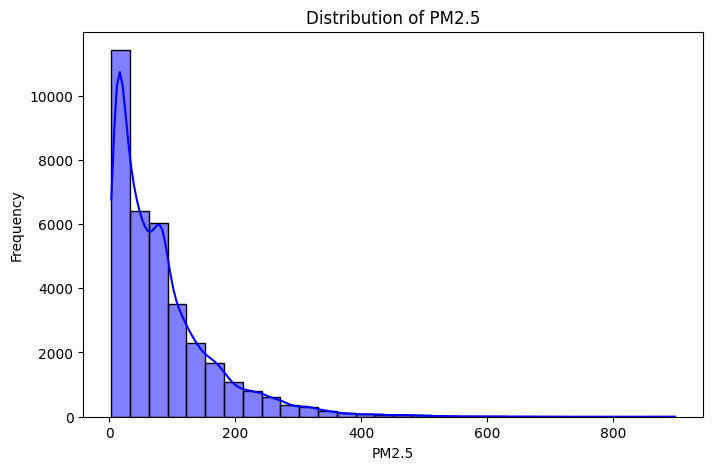

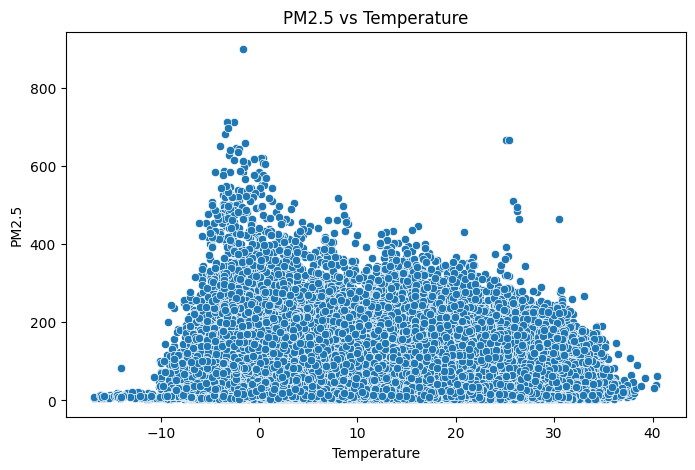

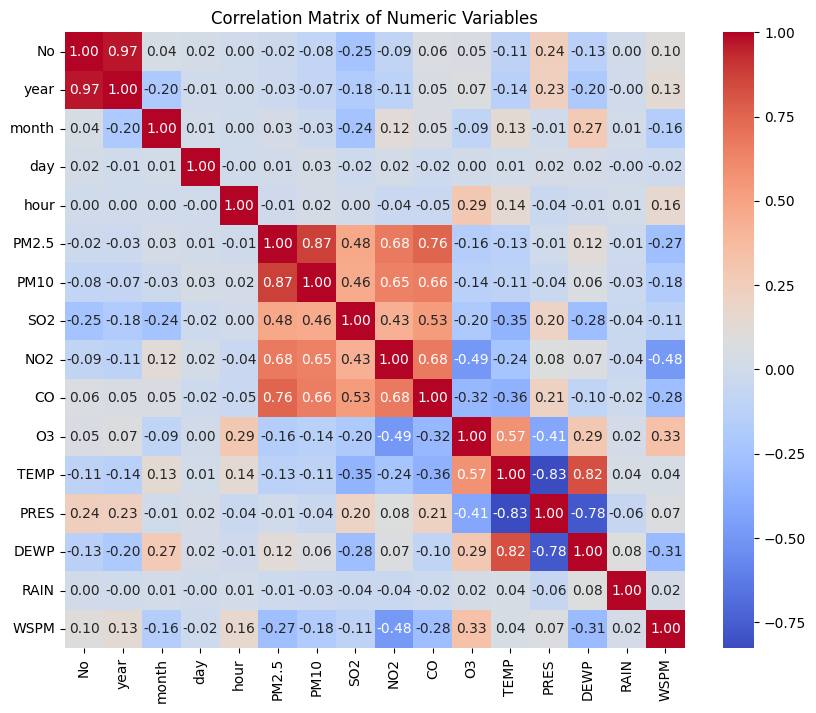

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())

# Univariate Analysis: Histogram of PM2.5
plt.figure(figsize=(8, 5))
sns.histplot(df['PM2.5'], bins=30, kde=True, color='blue')
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

# Bivariate Analysis: Scatter plot of PM2.5 vs TEMP
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['TEMP'], y=df['PM2.5'])
plt.title("PM2.5 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")
plt.show()

# Multivariate Analysis: Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

# Task 3: Model Building

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Selecting th target variable and features
X = df[['TEMP', 'PRES', 'DEWP']]  # Example features
y = df['PM2.5']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializing and training the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
# Predicting on test data
y_pred = model.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Value: {r2}")

Mean Squared Error: 4092.9301085006095
R-Squared Value: 0.3460915417609578


# Task 4: Application Development

In [11]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the dataset
@st.cache
def load_data():
    return pd.read_csv("cleaned_dataset.csv")

df = load_data()
# Navigation
st.title("Air Quality Analysis Application")
page = st.sidebar.selectbox("Navigation", ["Data Overview", "EDA", "Modeling and Prediction"])
# Data Overview Section
if page == "Data Overview":
    st.header("Dataset Overview")
    st.write(df.head())
    st.write("Dataset Info:")
    st.write(df.describe())
# EDA Section
elif page == "EDA":
    st.header("Exploratory Data Analysis")

    # Histogram
    st.subheader("PM2.5 Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df['PM2.5'], bins=30, kde=True, color='blue', ax=ax)
    st.pyplot(fig)

    # Correlation Matrix
    st.subheader("Correlation Matrix")
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    st.pyplot(fig)

# Modeling and Prediction Section
elif page == "Modeling and Prediction":
    st.header("Random Forest Model")

    # Train-test split and prediction
    X = df[['TEMP', 'PRES', 'DEWP']]
    y = df['PM2.5']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Display results
    st.write("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    st.write("R-Squared Value:", r2_score(y_test, y_pred))

2024-12-16 05:30:15.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 05:30:15.604 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-16 05:30:15.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 05:30:15.610 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

2024-12-16 05:30:15.612 No runtime found, using MemoryCacheStorageManager
2024-12-16 05:30:15.616 No runtime found, using MemoryC